<a href="https://colab.research.google.com/github/ngabo-dev/water-model-peer-group-4/blob/main/Jean_Pierre_formative_II_water_quality_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


Step 1: Load the Dataset

In [49]:
# LOAD THE DATA
import pandas as pd

# Load the dataset
data = pd.read_csv('water_potability.csv')

# Display first few rows
print(data.head())


         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


Step 2: Preprocess the Data

In [50]:
# Handling missing values if any
data.fillna(data.mean(), inplace=True)

# Split into features (X) and target (y)
X = data.drop('Potability', axis=1)
y = data['Potability']

Step 3: Scale the Features

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

 Step 4: Split into Train, Validation, and Test Sets

In [52]:

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# First split: train vs temp (test + val)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.15, random_state=42, stratify=y)

# Second split: val vs test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.15/0.85, random_state=42, stratify=y_temp)

# One-hot encode the target variable
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# Each Memeber Defines their model Here

In [53]:
# Model Definition by member 1
def model_Jean_Pierre_Niyongabo(input_shape, num_classes):
    from tensorflow.keras import layers, models, regularizers

    model = models.Sequential()

    model.add(layers.InputLayer(input_shape=input_shape))

    model.add(layers.Dense(128, activation='relu',
              kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.001)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Dense(64, activation='relu',
              kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.001)))
    model.add(layers.Dropout(0.25))

    # Use sigmoid for binary classification (i.e., if num_classes == 1)
    if num_classes == 1:
        model.add(layers.Dense(1, activation='sigmoid'))
    else:
        model.add(layers.Dense(num_classes, activation='softmax'))

    return model

Compile Model

In [54]:
# Compile the model
from tensorflow.keras.optimizers import Adam

model = model_Jean_Pierre_Niyongabo(input_shape=X_train.shape[1:], num_classes=y_train.shape[1])
optimizer = Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


# Start the training Process

In [55]:
# Setup for training
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=6,
    min_delta=0.002,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    verbose=0,
    callbacks=[early_stopping]
)

Evaluate and Plot

Train Accuracy: 0.675, Precision: 0.675, Recall: 0.675
Test Accuracy: 0.747, Precision: 0.747, Recall: 0.747


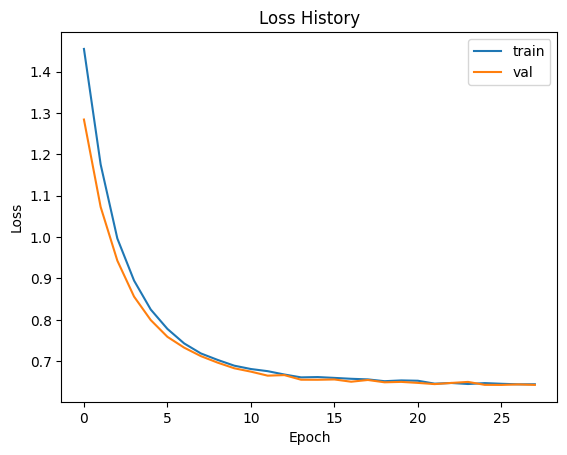

In [56]:
# Evaluate and visualize results
import matplotlib.pyplot as pyplot

# Evaluate the model on train and test sets
train_loss, train_acc, train_precision, train_recall = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc, test_precision, test_recall = model.evaluate(X_test, y_test, verbose=0)

# Print results
print(f"Train Accuracy: {train_acc:.3f}, Precision: {train_precision:.3f}, Recall: {train_recall:.3f}")
print(f"Test Accuracy: {test_acc:.3f}, Precision: {test_precision:.3f}, Recall: {test_recall:.3f}")

# Plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.title("Loss History")
pyplot.xlabel("Epoch")
pyplot.ylabel("Loss")
pyplot.show()

In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Evaluate loss and accuracy
train_loss, train_accuracy, train_precision, train_recall = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test, verbose=0)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Convert predictions and true labels to class indices
y_pred_train_labels = np.argmax(y_pred_train, axis=1)
y_pred_test_labels = np.argmax(y_pred_test, axis=1)
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# F1 Scores
f1_train = f1_score(y_train_labels, y_pred_train_labels, average='weighted')
f1_test = f1_score(y_test_labels, y_pred_test_labels, average='weighted')

# Print all metrics
print("----- Training Metrics -----")
print(f"Accuracy:  {train_accuracy:.3f}")
print(f"Precision: {train_precision:.3f}")
print(f"Recall:    {train_recall:.3f}")
print(f"Loss:      {train_loss:.3f}")
print(f"F1 Score:  {f1_train:.3f}\n")

print("----- Test Metrics -----")
print(f"Accuracy:  {test_accuracy:.3f}")
print(f"Precision: {test_precision:.3f}")
print(f"Recall:    {test_recall:.3f}")
print(f"Loss:      {test_loss:.3f}")
print(f"F1 Score:  {f1_test:.3f}")

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
----- Training Metrics -----
Accuracy:  0.675
Precision: 0.675
Recall:    0.675
Loss:      0.637
F1 Score:  0.630

----- Test Metrics -----
Accuracy:  0.747
Precision: 0.747
Recall:    0.747
Loss:      0.610
F1 Score:  0.715
